In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import pylab
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import seaborn as sb
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv("test.csv")
df.dropna()
print(df.shape)
print(list(df.columns))
df.head()

(25976, 25)
['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [3]:
#check for missing data
df.isna().any()

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

In [4]:
df.fillna(df.mean(), inplace=True)

In [5]:
df.isna()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.nunique()

Unnamed: 0                           25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Del

In [7]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [8]:
df.loc[detect_outliers(df,["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient",
                                       "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", 
                                       "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                                       "Checkin service", "Inflight service", "Cleanliness", "Departure Delay in Minutes",
                                       "Arrival Delay in Minutes"])]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
145,145,7237,Female,Loyal Customer,53,Business travel,Business,3769,3,1,5,1,1,3,1,2,4,3,4,1,2,1,180,178.0,neutral or dissatisfied
853,853,4380,Female,Loyal Customer,52,Business travel,Business,3894,1,1,1,1,3,1,5,5,5,5,3,1,5,2,0,50.0,satisfied
946,946,103160,Male,Loyal Customer,40,Business travel,Business,3799,2,2,5,2,2,4,5,5,5,5,5,3,5,3,81,96.0,satisfied
1279,1279,37388,Female,Loyal Customer,32,Business travel,Business,3880,3,3,3,3,5,5,5,3,2,5,1,5,2,5,146,171.0,satisfied
1358,1358,129730,Female,Loyal Customer,48,Business travel,Business,3801,4,4,2,4,5,3,2,4,4,4,4,3,4,2,100,94.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25527,25527,13333,Female,Loyal Customer,30,Business travel,Business,1663,1,1,1,1,4,4,4,4,3,3,3,1,4,4,121,103.0,satisfied
25593,25593,7291,Male,Loyal Customer,49,Personal Travel,Eco,135,3,0,3,3,3,1,1,4,5,5,5,1,4,1,51,132.0,neutral or dissatisfied
25697,25697,48833,Female,Loyal Customer,70,Personal Travel,Business,266,1,4,0,3,0,1,1,3,2,4,3,1,1,1,153,143.0,neutral or dissatisfied
25757,25757,38373,Female,Loyal Customer,58,Personal Travel,Eco,1133,1,3,1,4,1,1,1,3,1,3,3,1,1,1,151,162.0,neutral or dissatisfied


In [9]:
df = df.drop(detect_outliers(df,["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient",
                                       "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", 
                                       "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                                       "Checkin service", "Inflight service", "Cleanliness", "Departure Delay in Minutes",
                                       "Arrival Delay in Minutes"]),axis = 0).reset_index(drop = True)

In [10]:
def bar_plot(variable):
    # we get the features
    var = df[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

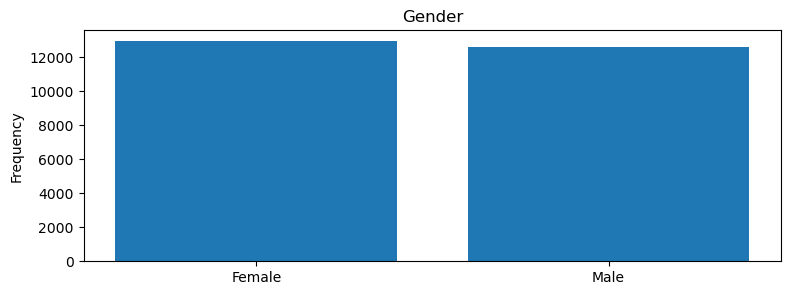

Gender: 
 Female    12925
Male      12578
Name: Gender, dtype: int64


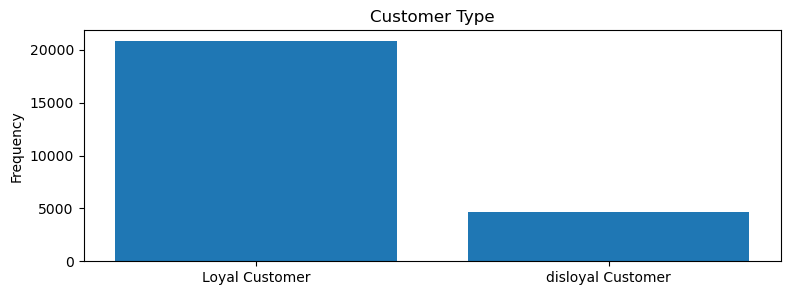

Customer Type: 
 Loyal Customer       20801
disloyal Customer     4702
Name: Customer Type, dtype: int64


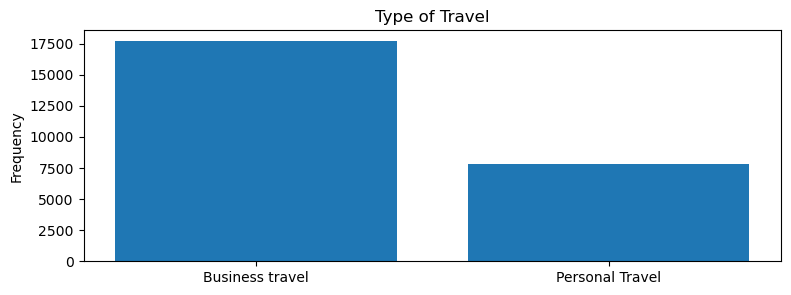

Type of Travel: 
 Business travel    17686
Personal Travel     7817
Name: Type of Travel, dtype: int64


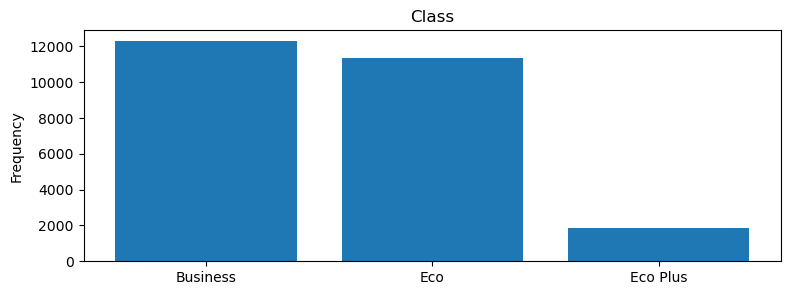

Class: 
 Business    12287
Eco         11354
Eco Plus     1862
Name: Class, dtype: int64


In [11]:
categorical_var = ["Gender", "Customer Type", "Type of Travel", "Class"]
for each in categorical_var:
    bar_plot(each)

In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

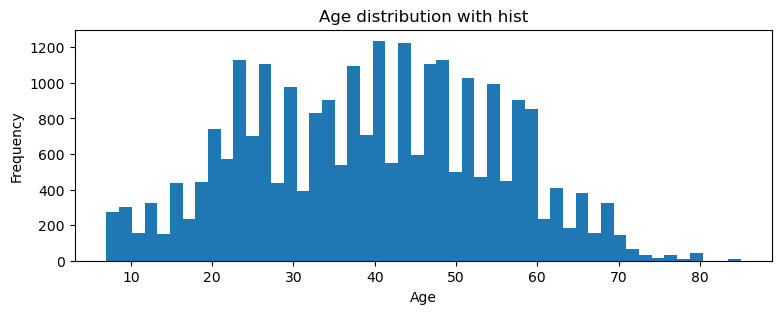

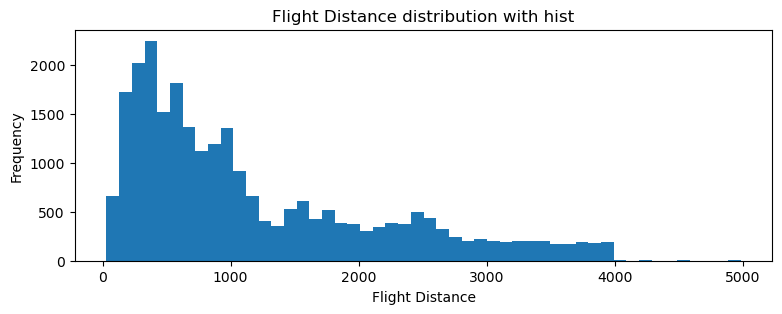

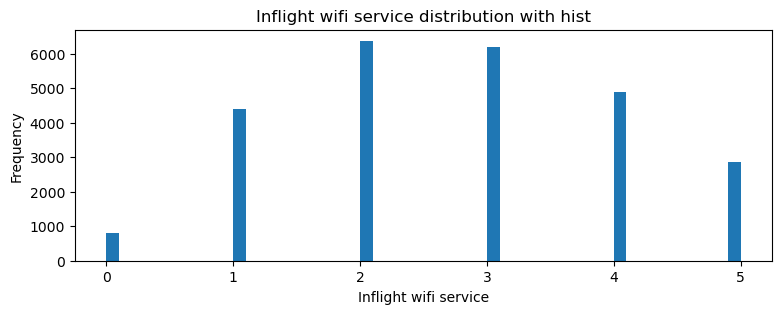

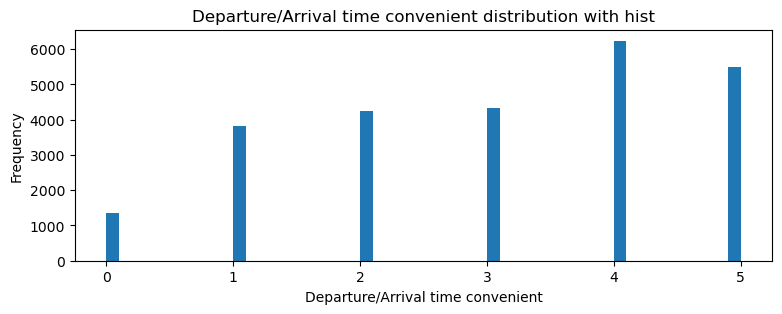

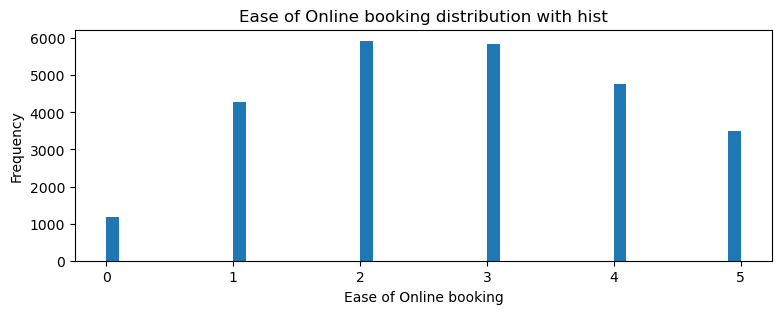

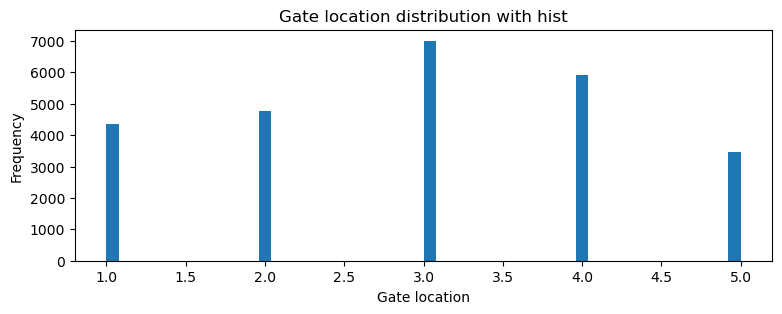

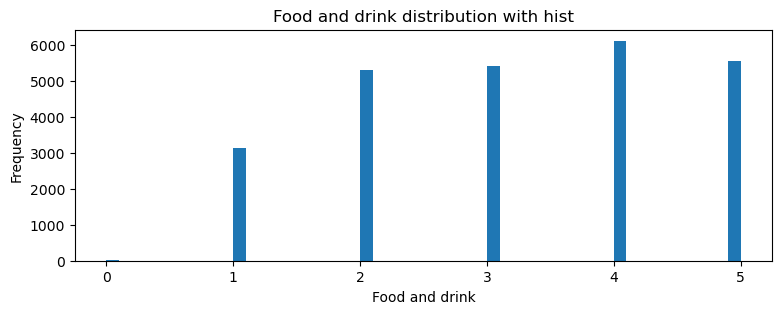

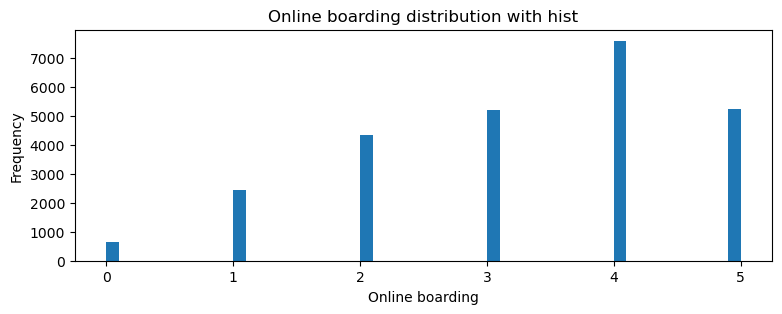

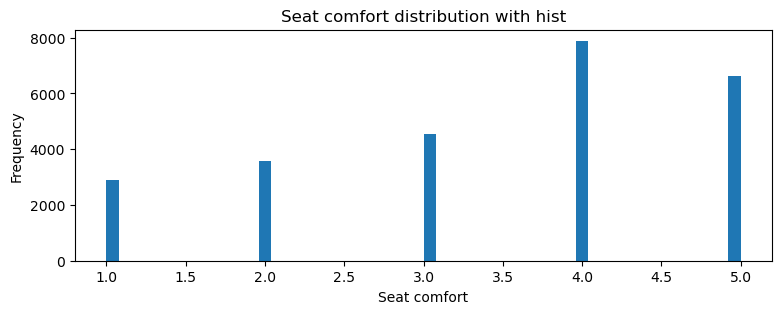

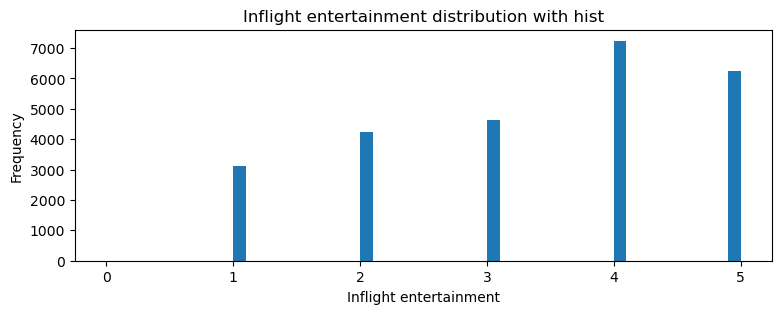

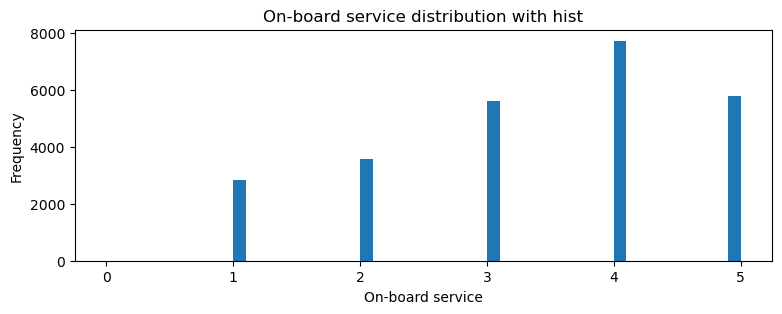

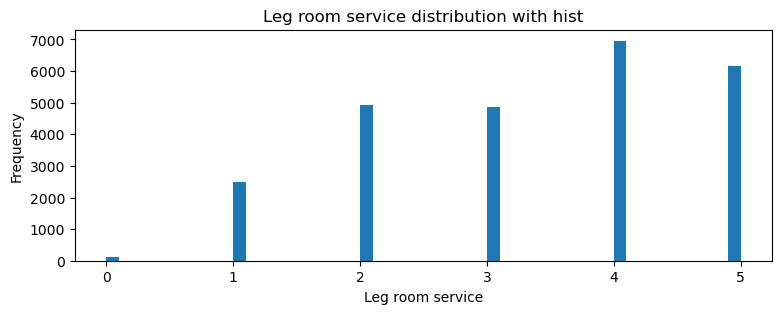

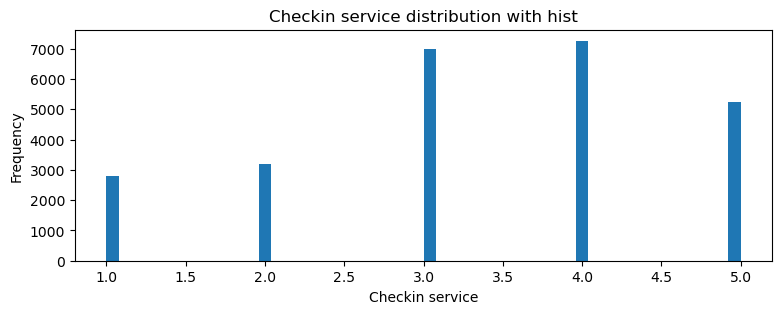

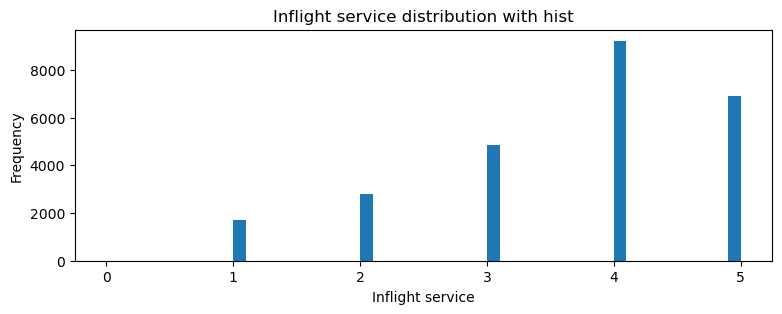

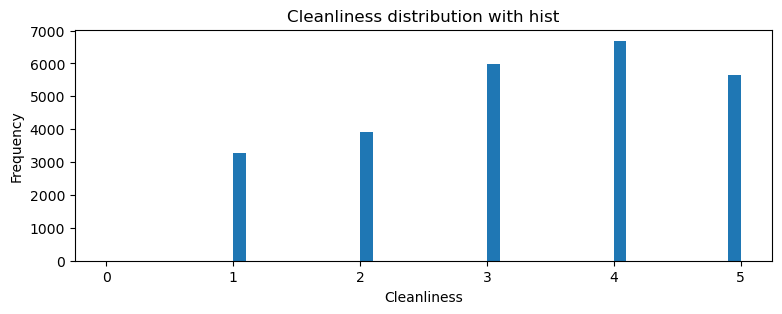

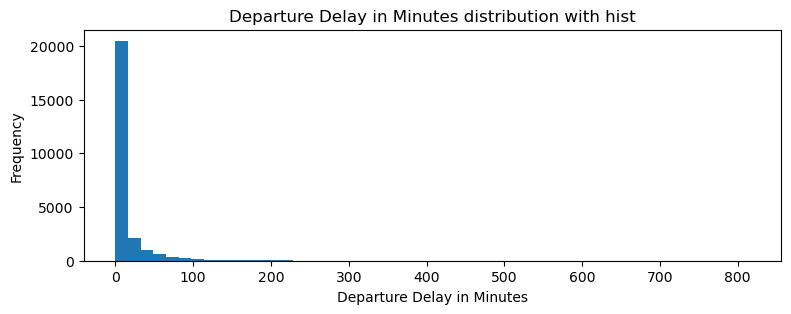

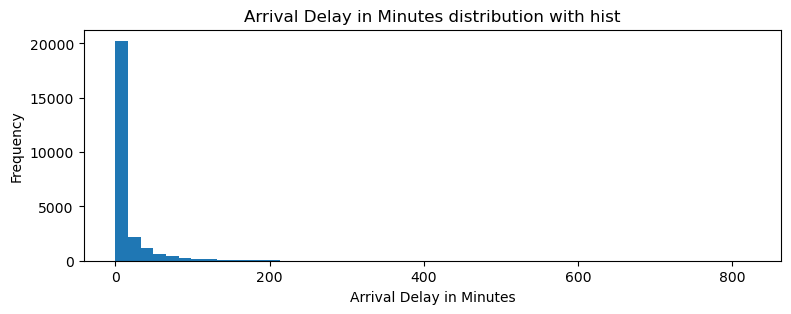

In [13]:
numerical_var = ["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Checkin service", "Inflight service", "Cleanliness", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in numerical_var:
    plot_hist(n)

In [16]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

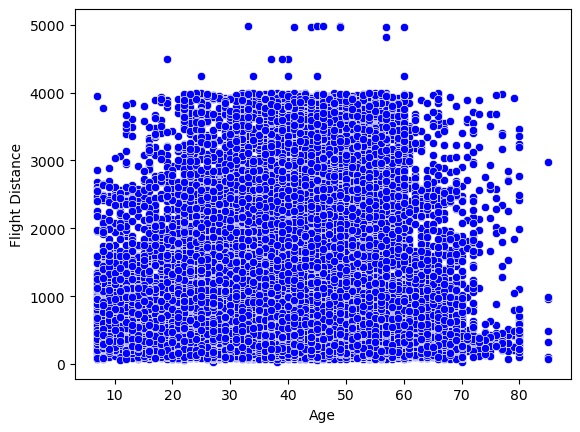

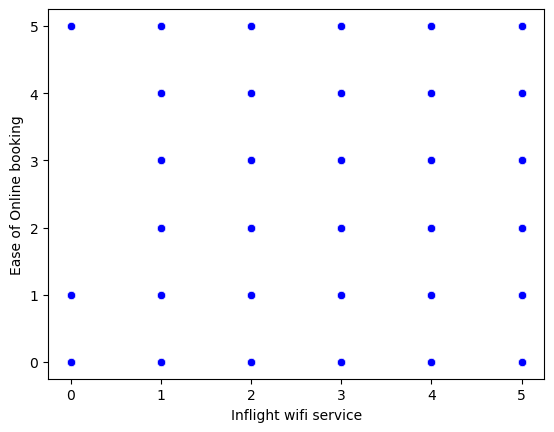

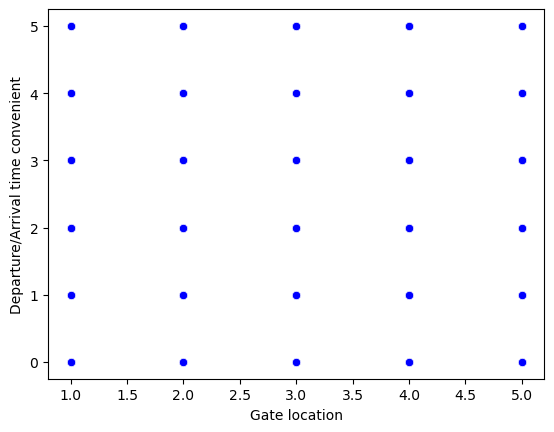

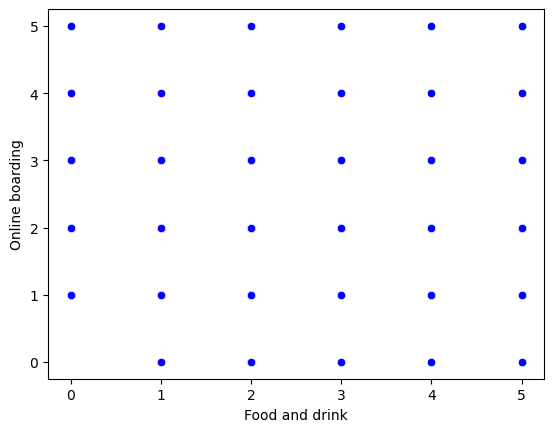

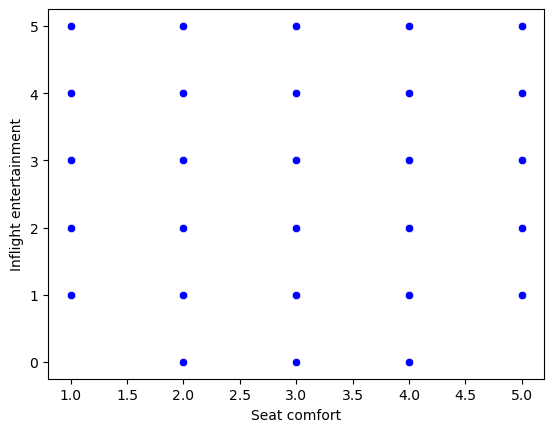

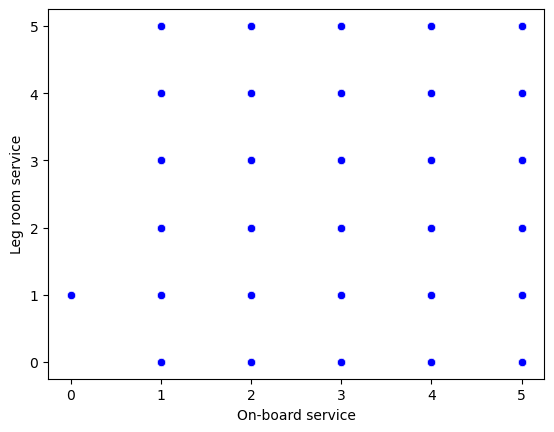

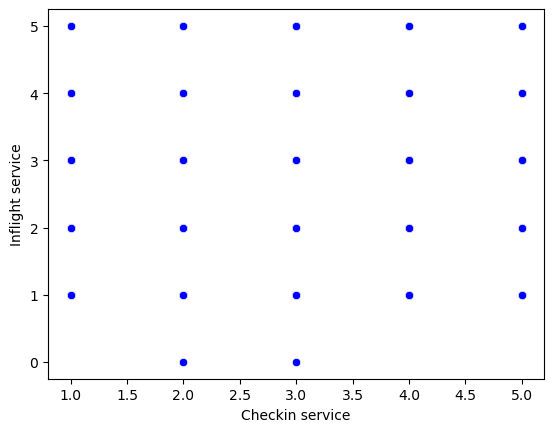

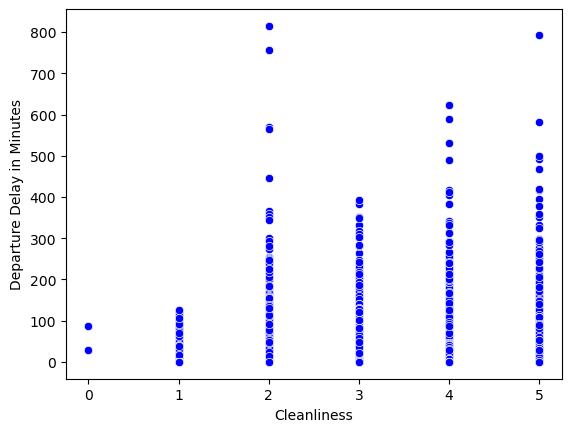

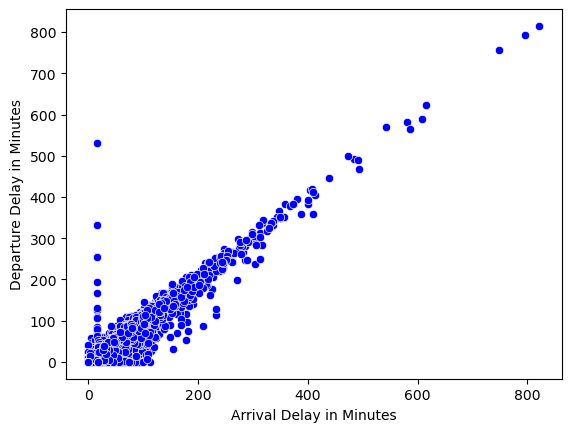

In [17]:
#create scatterplots to look for correlations
sns.scatterplot(x=df['Age'],y=df['Flight Distance'],color='blue')
plt.show();
sns.scatterplot(x=df['Inflight wifi service'],y=df['Ease of Online booking'],color='blue')
plt.show();
sns.scatterplot(x=df['Gate location'],y=df['Departure/Arrival time convenient'],color='blue')
plt.show();
sns.scatterplot(x=df['Food and drink'],y=df['Online boarding'],color='blue')
plt.show();
sns.scatterplot(x=df['Seat comfort'],y=df['Inflight entertainment'],color='blue')
plt.show();
sns.scatterplot(x=df['On-board service'],y=df['Leg room service'],color='blue')
plt.show();
sns.scatterplot(x=df['Checkin service'],y=df['Inflight service'],color='blue')
plt.show();
sns.scatterplot(x=df['Cleanliness'],y=df['Departure Delay in Minutes'],color='blue')
plt.show();
sns.scatterplot(x=df['Arrival Delay in Minutes'],y=df['Departure Delay in Minutes'],color='blue')
plt.show();

In [18]:
#check for duplicate data in columns
df[df.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [19]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [20]:
# check if any rows are duplicated - looking for False
df.duplicated().any()

False

In [21]:
# Lets verify columns were dropped
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
#The overview of descriptive statistics
df.describe()

In [ ]:
df.columns

In [ ]:
df.info

In [ ]:
df.head()

In [22]:
# The dropping of varibales not neccessary for this data analysis
cols = ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Type of Travel',
       'Class', 'satisfaction']

df = df.drop(cols, axis=1)

In [23]:
#Lets ensure values were changed
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0


In [24]:
print(list(df.columns))

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


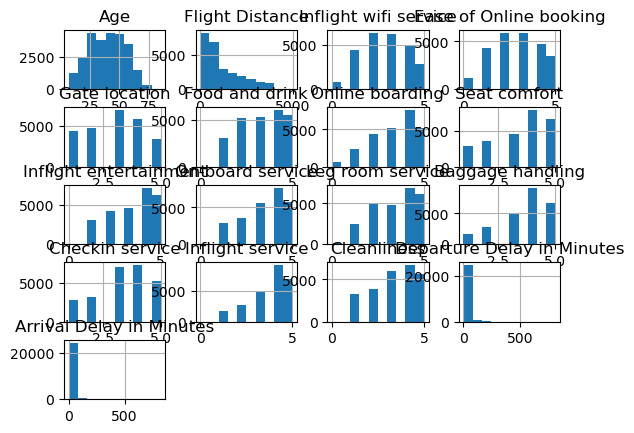

In [25]:
#create histograms of continuous variables
df[['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
     'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].hist()
plt.savefig('Airline Passenger satisfaction plot,jpg')

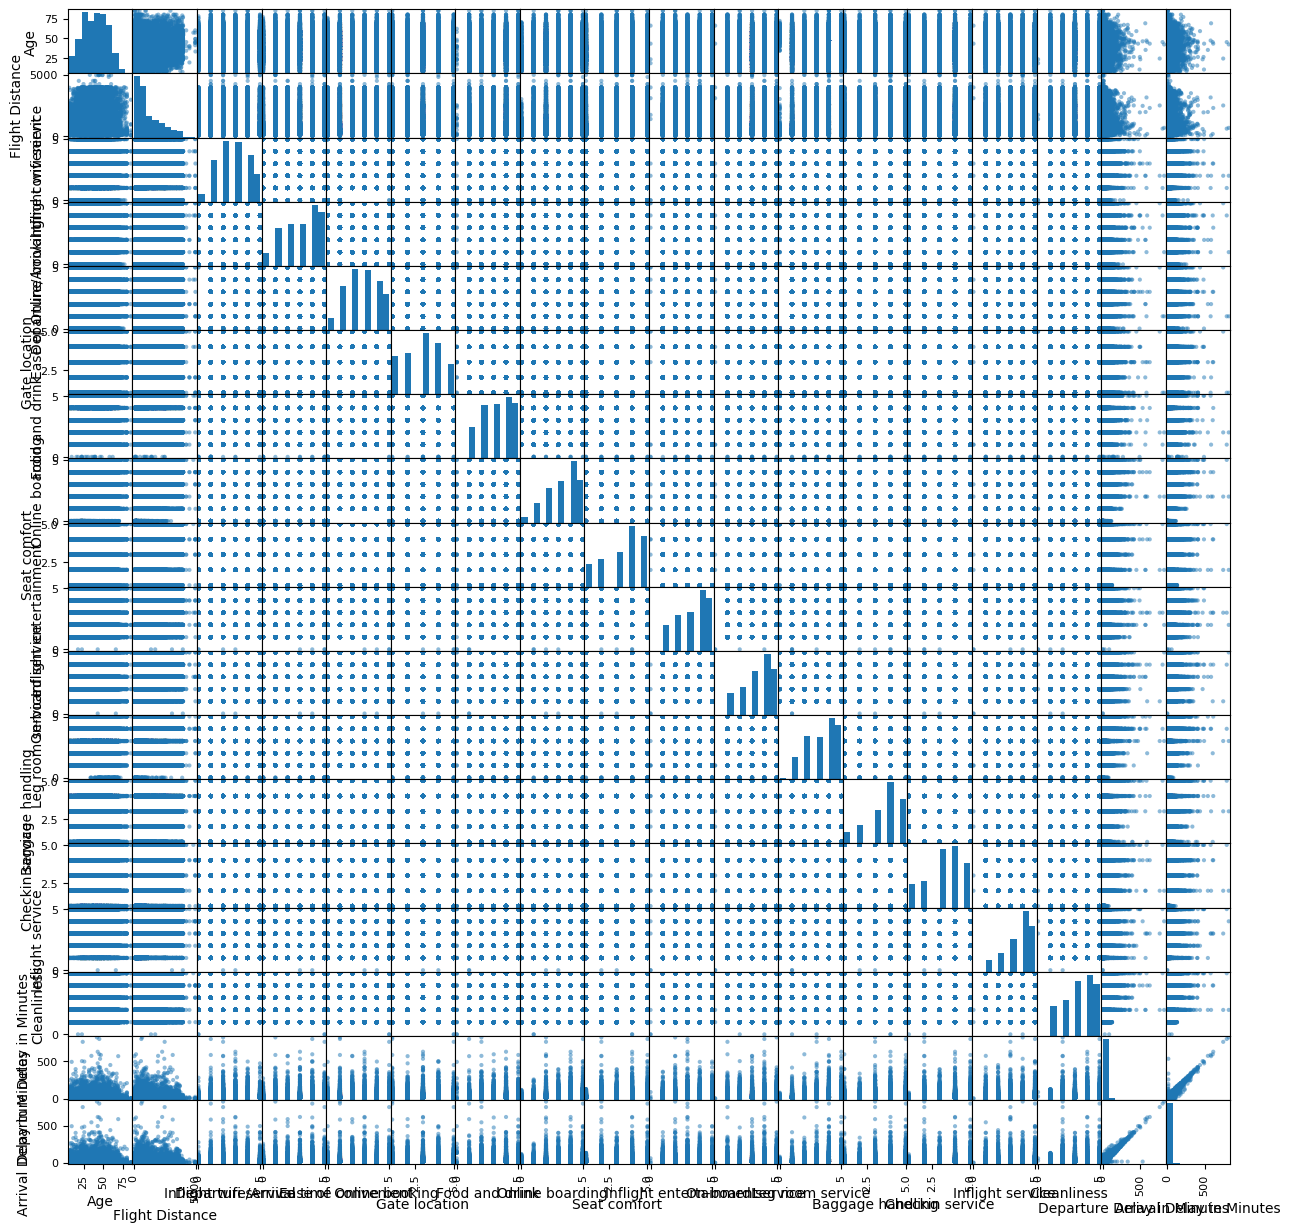

In [28]:
#lets create scatterplots for numeric variables to view distributions and look for relationships
Airline =df[['Age', 'Flight Distance', 'Inflight wifi service', 
                                    'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
pd.plotting.scatter_matrix(Airline,figsize=[15,15]);

In [29]:
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25498,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25499,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25500,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25501,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [31]:
#export prepared dataset
df.to_csv('prepared_d214task2.csv', index = False)

In [32]:

# Principal Component Analysis (PCA) - Decomposition
df2 = pd.read_csv("prepared_d214task2.csv", index_col=1)

In [33]:
df2.head()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Flight Distance,,,,,,,,,,,,,,,,,
160,52,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
2863,36,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
192,20,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3377,44,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
1182,49,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0


In [34]:
df2.columns

Index(['Age', 'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25503 entries, 160 to 264
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                25503 non-null  int64  
 1   Inflight wifi service              25503 non-null  int64  
 2   Departure/Arrival time convenient  25503 non-null  int64  
 3   Ease of Online booking             25503 non-null  int64  
 4   Gate location                      25503 non-null  int64  
 5   Food and drink                     25503 non-null  int64  
 6   Online boarding                    25503 non-null  int64  
 7   Seat comfort                       25503 non-null  int64  
 8   Inflight entertainment             25503 non-null  int64  
 9   On-board service                   25503 non-null  int64  
 10  Leg room service                   25503 non-null  int64  
 11  Baggage handling                   25503 non-null  int

In [36]:
# Standardizing the feature matrix
X = StandardScaler().fit_transform(df2)
print(); print(X)


[[ 0.81757446  1.70139353  0.61911636 ...  1.29584511  1.08250658
   0.89358859]
 [-0.23952375 -1.29261297 -1.33662161 ...  1.29584511 -0.37455275
  -0.38639489]
 [-1.29662195 -0.54411135 -1.98853426 ... -0.98652358 -0.37455275
  -0.38639489]
 ...
 [-1.49482786 -0.54411135  1.27102902 ... -0.98652358 -0.37455275
  -0.38639489]
 [-1.69303377  0.20439028 -0.0327963  ...  0.53505555 -0.37455275
  -0.38639489]
 [ 0.15688808 -0.54411135  1.27102902 ... -1.74731315 -0.37455275
  -0.38639489]]


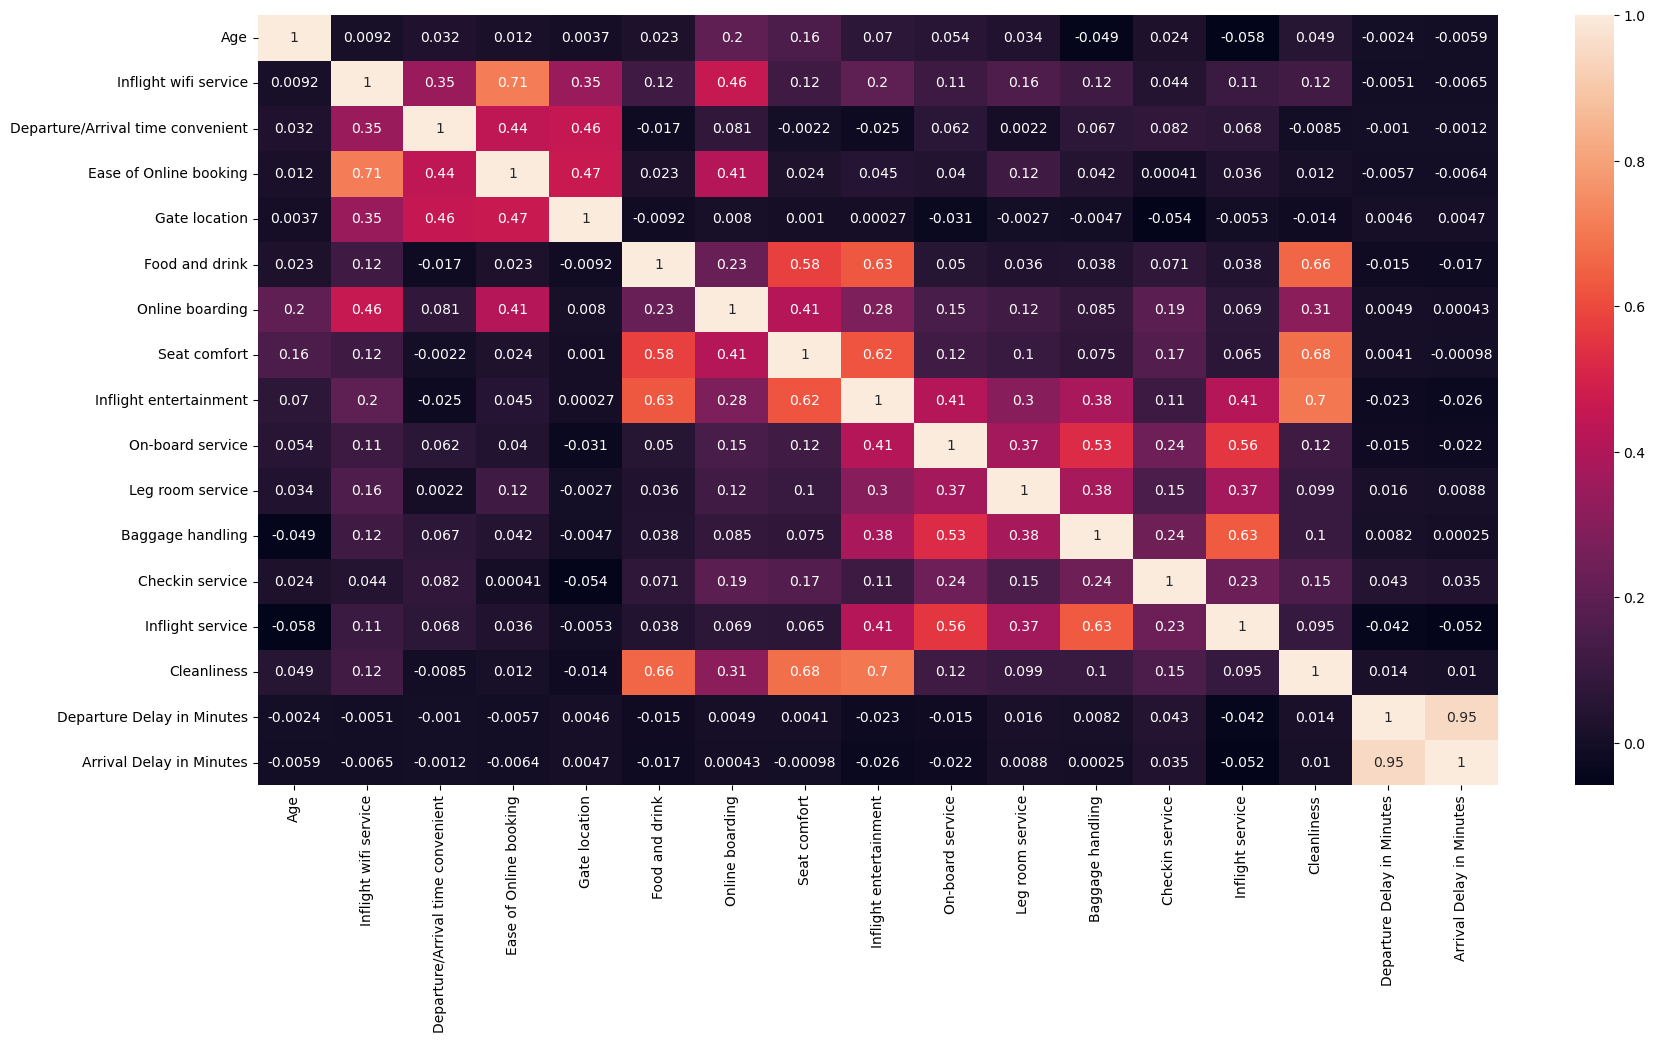

In [40]:
# Generate the correlation of the matrix for the components and a heatmap
cmatrix = df2.corr()
plt.figure(figsize=(20, 10))
sb.heatmap(cmatrix, annot=True)
plt.show()

In [57]:
df2_normalized=(df2-df2.mean())/df2.std()


In [58]:
pca = PCA(n_components=df2.shape[1])

In [59]:
pca.fit(df2_normalized)

PCA(n_components=17)

In [60]:
df2_normalized.head()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Flight Distance,,,,,,,,,,,,,,,,,
160,0.817558,1.701360,0.619104,0.172986,0.79901,-0.165473,0.538111,-0.350836,1.224408,1.254180,1.248681,1.156429,-1.083799,1.138256,1.295820,1.082485,0.893571
2863,-0.239519,-1.292588,-1.336595,0.172986,-1.53925,1.339272,0.538111,1.170827,0.477194,0.473288,0.490644,0.306381,-0.280890,0.290027,1.295820,-0.374545,-0.386387
192,-1.296597,-0.544101,-1.988495,-0.534918,0.79901,-0.917846,-0.940071,-1.111668,-1.017234,0.473288,-1.783464,-0.543666,-1.083799,-1.406431,-0.986504,-0.374545,-0.386387
3377,0.289020,-2.041075,-1.988495,-1.950727,-0.75983,-0.165473,0.538111,0.409995,-1.764448,-1.869390,-1.783464,-2.243761,-0.280890,-2.254659,0.535045,-0.374545,-0.211848
1182,0.619356,-0.544101,-0.032796,0.880890,0.01959,0.586900,-1.679161,-1.111668,-1.017234,-1.088497,-1.025428,-1.393714,0.522018,-1.406431,0.535045,-0.374545,0.195412


In [61]:
df2.columns

Index(['Age', 'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [62]:
df212_pca = PCA(n_components=df2_normalized.shape[1])

In [63]:
df212_pca.fit(df2_normalized)

PCA(n_components=17)

In [64]:
df212_pca_df = pd.DataFrame(df212_pca.transform(df2_normalized),
                            columns=['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
     'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

In [65]:
# Create loading of the values for components

columns=['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
     'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df212_loadings = pd.DataFrame(df212_pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'], index=df2.columns)
df212_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Age,-0.061382,-0.006340,0.104365,-0.007638,0.624636,-0.440399,0.550370,0.037170,0.072846,0.219674,0.192385,-0.010155,0.051951,0.018129,0.030846,0.046543,-0.002717
Inflight wifi service,-0.228081,-0.449493,0.063333,-0.008580,0.063595,0.319725,-0.051068,0.074688,0.030253,0.126293,0.332543,0.033811,0.408415,-0.175933,-0.524713,0.160386,-0.000262
Departure/Arrival time convenient,-0.089814,-0.422144,-0.009711,-0.000483,-0.189509,-0.482727,-0.042686,0.026363,-0.706681,0.042803,-0.151359,-0.014220,-0.035112,0.032484,-0.098548,-0.076367,0.001798
Ease of Online booking,-0.159347,-0.529446,0.064378,-0.011059,0.041403,0.217387,-0.024366,0.010116,0.043317,0.046066,0.155759,-0.005652,-0.008879,-0.057466,0.777829,-0.060585,0.000008
Gate location,-0.060773,-0.429244,0.056567,-0.007028,-0.332436,-0.330859,0.177288,-0.167423,0.623209,-0.190977,-0.173653,0.004078,-0.179274,0.109840,-0.172644,0.017863,-0.000963
Food and drink,-0.307059,0.172843,0.334129,-0.036137,-0.237500,-0.014037,-0.002871,-0.019071,-0.073159,0.177235,0.450093,0.064002,-0.626201,-0.165391,-0.056620,0.199447,-0.002559
Online boarding,-0.279284,-0.160497,0.174064,0.002500,0.486975,0.271686,-0.175689,0.196572,-0.015233,-0.106052,-0.416000,-0.049459,-0.425569,0.267554,-0.192967,-0.092520,-0.000395
Seat comfort,-0.347032,0.159045,0.314279,-0.010961,0.028802,-0.110944,-0.016125,-0.051357,0.025736,-0.161817,-0.441580,-0.009409,0.219876,-0.661752,0.101976,0.143995,-0.004808
Inflight entertainment,-0.432256,0.176706,0.065342,-0.018676,-0.178822,0.033019,0.177234,0.057193,0.033035,-0.001076,0.110776,-0.058113,0.156672,0.074460,-0.049227,-0.812516,0.011095
On-board service,-0.277295,0.051479,-0.383881,0.024219,0.067590,-0.070871,0.101247,0.240199,-0.083378,-0.748741,0.264706,0.169992,-0.034020,-0.001102,0.035908,0.161210,-0.000781


In [66]:
data_frame = pd.DataFrame(df212_pca.components_.T, columns=['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
     'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

In [67]:
data_frame = pd.DataFrame(data_frame, columns=['Age', 'Flight Distance', 'Inflight wifi service', 
                                               'Ease of Online booking', 'Gate location', 'Food and drink', 
                                               'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                                               'On-board service', 'Leg room service',
                                               'Baggage handling', 'Checkin service', 'Inflight service', 
                                               'Cleanliness', 'Departure Delay in Minutes',
                                               'Arrival Delay in Minutes'])
df212_loadings = pd.DataFrame(df212_pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'], index=df2.columns)
df212_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Age,-0.061382,-0.006340,0.104365,-0.007638,0.624636,-0.440399,0.550370,0.037170,0.072846,0.219674,0.192385,-0.010155,0.051951,0.018129,0.030846,0.046543,-0.002717
Inflight wifi service,-0.228081,-0.449493,0.063333,-0.008580,0.063595,0.319725,-0.051068,0.074688,0.030253,0.126293,0.332543,0.033811,0.408415,-0.175933,-0.524713,0.160386,-0.000262
Departure/Arrival time convenient,-0.089814,-0.422144,-0.009711,-0.000483,-0.189509,-0.482727,-0.042686,0.026363,-0.706681,0.042803,-0.151359,-0.014220,-0.035112,0.032484,-0.098548,-0.076367,0.001798
Ease of Online booking,-0.159347,-0.529446,0.064378,-0.011059,0.041403,0.217387,-0.024366,0.010116,0.043317,0.046066,0.155759,-0.005652,-0.008879,-0.057466,0.777829,-0.060585,0.000008
Gate location,-0.060773,-0.429244,0.056567,-0.007028,-0.332436,-0.330859,0.177288,-0.167423,0.623209,-0.190977,-0.173653,0.004078,-0.179274,0.109840,-0.172644,0.017863,-0.000963
Food and drink,-0.307059,0.172843,0.334129,-0.036137,-0.237500,-0.014037,-0.002871,-0.019071,-0.073159,0.177235,0.450093,0.064002,-0.626201,-0.165391,-0.056620,0.199447,-0.002559
Online boarding,-0.279284,-0.160497,0.174064,0.002500,0.486975,0.271686,-0.175689,0.196572,-0.015233,-0.106052,-0.416000,-0.049459,-0.425569,0.267554,-0.192967,-0.092520,-0.000395
Seat comfort,-0.347032,0.159045,0.314279,-0.010961,0.028802,-0.110944,-0.016125,-0.051357,0.025736,-0.161817,-0.441580,-0.009409,0.219876,-0.661752,0.101976,0.143995,-0.004808
Inflight entertainment,-0.432256,0.176706,0.065342,-0.018676,-0.178822,0.033019,0.177234,0.057193,0.033035,-0.001076,0.110776,-0.058113,0.156672,0.074460,-0.049227,-0.812516,0.011095
On-board service,-0.277295,0.051479,-0.383881,0.024219,0.067590,-0.070871,0.101247,0.240199,-0.083378,-0.748741,0.264706,0.169992,-0.034020,-0.001102,0.035908,0.161210,-0.000781


In [68]:
import numpy as np
from numpy.linalg import eig

In [69]:
# The Creation of Eigen Values for components
cov_matrix = np.dot(df2_normalized.T, df2_normalized) / df2.shape[0]
eigen_values = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector
in df212_pca.components_]

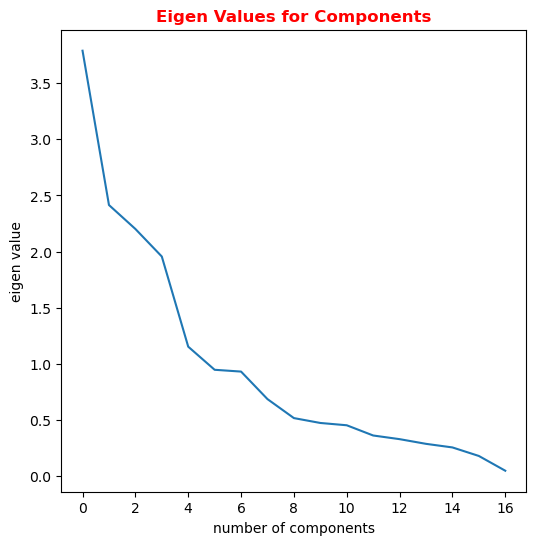

In [70]:
plt.figure(figsize=(6, 6))
plt.title("Eigen Values for Components", fontweight="bold", color='r')
plt.plot(eigen_values)
plt.xlabel('number of components')
plt.ylabel('eigen value')
plt.show()

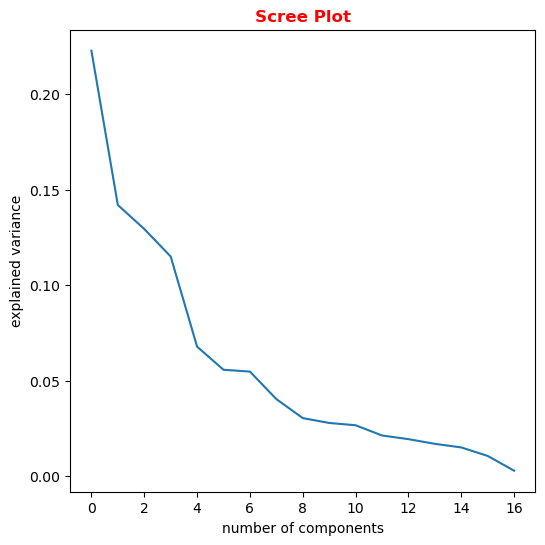

In [71]:
# Creation of Scree Plot to view  and explaine variance for components
plt.figure(figsize=(6, 6))
plt.title("Scree Plot", fontweight="bold", color='r')
plt.plot(df212_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [72]:
# PCA projection
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
              , columns = ['PC1','PC2','PC3','PC4'])
pd.DataFrame.from_records(principalDf)

,PC1,PC2,PC3,PC4
0,-2.574496,-1.066704,-0.939936,1.405048
1,-1.501775,2.415568,0.580663,-0.558592
2,3.112698,0.378958,-0.015555,-0.635205
3,3.478470,2.547560,3.177164,-0.595042
4,2.061532,-0.264783,1.595516,-0.235170
...,...,...,...,...
25498,-0.784500,0.952756,0.053159,-0.561925
25499,-2.526751,-1.043882,-1.123303,-0.358305
25500,1.665846,-0.622421,-2.102926,-0.337293
25501,-1.230696,0.208288,-0.232720,-0.520932


In [73]:
pca.explained_variance_ratio_ 

array([0.22284003, 0.1420465 , 0.1295092 , 0.11508583])

In [ ]:
#PCA1 = 22.29%, PCA2 = 14.21% , PCA3= 12.96%, PCA4 = 11.51%, the total variance of the PC we decide to keep = 60.97 which gives us a feasible total variance suitible for further analysis.
However,The rest of the varinaces are contained in the rest of the principal components that were being reduced becuase they contian less qunatity of varinace. 